Based on the lesson, Linear Regression Analysis | Linear Regression in Python | Machine Learning Algorithms (36 mins) from Week 5: Day 3 on the LMS, predict the loss of 1000 companies. Use only two attributes (Product Development and Advertisement) in the dataset as independent variables. The Loss attribute in the dataset should be the dependent variable. Click here for dataset.

In [27]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# load the data 
data = pd.read_csv('1000_Companies_Loss.csv')

In [29]:
data

,R&D Spend,Product Development,Administration,Marketing Spend,Advertisement,State,Profit,Loss
0,165349.20,82674.60,136897.800,471784.1000,78630.68,New York,192261.83000,1.922618e+04
1,162597.70,81298.85,151377.590,443898.5300,73983.09,California,191792.06000,1.917921e+04
2,153441.51,76720.76,101145.550,407934.5400,67989.09,Florida,191050.39000,1.910504e+04
3,144372.41,72186.21,118671.850,383199.6200,63866.60,New York,182901.99000,1.829020e+04
4,142107.34,71053.67,91391.770,366168.4200,61028.07,Florida,166187.94000,1.661879e+04
...,...,...,...,...,...,...,...,...
995,54135.00,5413500.00,118451.999,173232.6695,1732326.70,California,95279.96251,9.527996e+07
996,134970.00,13497000.00,130390.080,329204.0228,3292040.23,California,164336.60550,1.643366e+08
997,100275.47,10027547.00,241926.310,227142.8200,2271428.20,California,413956.48000,4.139565e+08
998,128456.23,12845623.00,321652.140,281692.3200,2816923.20,California,333962.19000,3.339622e+08


In [30]:
ladata = data[['Product Development','Advertisement','Loss']]

In [31]:
ladata

,Product Development,Advertisement,Loss
0,82674.60,78630.68,1.922618e+04
1,81298.85,73983.09,1.917921e+04
2,76720.76,67989.09,1.910504e+04
3,72186.21,63866.60,1.829020e+04
4,71053.67,61028.07,1.661879e+04
...,...,...,...
995,5413500.00,1732326.70,9.527996e+07
996,13497000.00,3292040.23,1.643366e+08
997,10027547.00,2271428.20,4.139565e+08
998,12845623.00,2816923.20,3.339622e+08


In [32]:
# declaring the dependent and independent variables
x = ladata[['Product Development','Advertisement']]
y = ladata['Loss']

In [33]:
x.shape

(1000, 2)

In [34]:
y.shape

(1000,)

In [35]:
x_=sm.add_constant(x)

In [36]:
results = sm.OLS(y,x_).fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2664.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        00:03:44   Log-Likelihood:                -18408.
No. Observations:                1000   AIC:                         3.682e+04
Df Residuals:                     997   BIC:                         3.684e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 6.18e+06   8.47e+05      7.300      0.000    4.52e+06    7.84e+06
Product Development    13.8588      0.409     33.897      0.000      13.056      14.661
Advertisement          -0.4175      0.173     -2.417      0.016      -0.756      -0.079
==============================================================================
Omnibus:                     1056.831   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62954.664
Skew:                           5.077   Prob(JB):                         0.00
Kurtosis:                      40.521   Cond. No.                     1.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
reg = LinearRegression().fit(x,y)

In [40]:
reg.score(x,y)

0.8423829190759519

In [41]:
reg.coef_

array([13.85878362, -0.41749632])

In [21]:
predictions= pd.DataFrame(reg.predict(x),columns=['predictions'])

In [22]:
predictions

,predictions
0,7.292574e+06
1,7.275449e+06
2,7.214504e+06
3,7.153382e+06
4,7.138871e+06
...,...
995,8.048092e+07
996,1.918572e+08
997,1.442009e+08
998,1.830283e+08


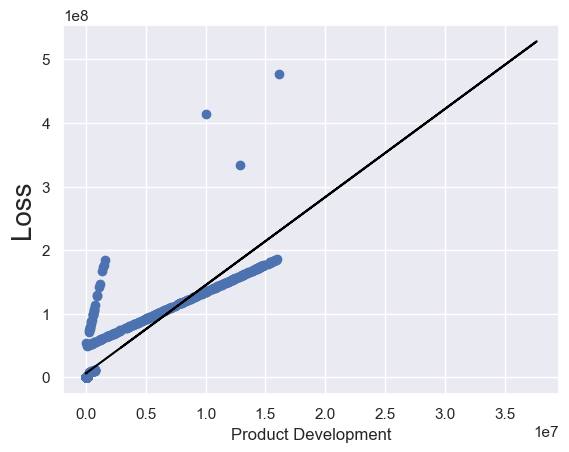

In [50]:
plt.scatter(data['Product Development'],y)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Product Development')
yhat = 13.8588*data['Advertisement'] + 6180000
fig = plt.plot(data['Advertisement'],yhat, c = 'black')